**AUTOR:** Gabriel Moreira Silva

**Graduação:** Ciência de Dados (EAD)

**RGM:** 1632929871

# Limpeza dos dados (Data Wrangling)

## Descrição 
Para a Atividade proposta eu decidi baixar um dataset do [portal do CEAPS](https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps?utm_source=ActiveCampaign&utm_medium=email&utm_content=%237DaysOfCode+-+Ci%C3%AAncia+de+Dados+1%2F7%3A+Data+Cleaning+and+Preparation&utm_campaign=%5BAlura+%237Days+Of+Code%5D%28Java%29+Dia+1%2F7%3A+Consumir+uma+API+de+filmes) (Cota para Exercício da Atividade Parlamentar dos Senadores) e aplicar processos de tratamento, limpeza de dados (processo conhecido como Data Wrangling) e Visualização da Informação.

Importando Bibliotecas importantes para visualização e Data Wrangling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
dataframe = pd.read_csv("./despesa_ceaps_2022.csv", encoding="latin1", sep=';', index_col=False, skiprows=1)
dataframe

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,Despesa com pagamento de aluguel de imóvel par...,6000,2173614
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,Despesa com divulgação da atividade parlamenta...,1500,2173615
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,Despesa com produção de texto e edição de víde...,6000,2173616
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,18/01/2022,Divulgação da atividade parlamentar,1000,2173618
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,17/01/2022,Divulgação da atividade parlamentar,2000,2173617
...,...,...,...,...,...,...,...,...,...,...,...
16777,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WIXHAI,06/12/2022,"Companhia Aérea: LATAM, Localizador: WIXHAI. P...","2893,04",2191398
16778,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WITOLM,09/12/2022,"Companhia Aérea: GOL, Localizador: WITOLM. Pas...","1180,19",2192272
16779,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,THPKVQ,20/12/2022,"Companhia Aérea: TAM, Localizador: THPKVQ. Pas...","2671,9",2192274
16780,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,QNN9HX,21/12/2022,"Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...","1334,31",2192244


In [3]:
dataframe_tratado = dataframe.copy()

## Verificação das Colunas
Para podermos fazer a visualização de forma correta dos dados precisamos nos assegurar que os tipos das colunas estão corretos

In [4]:
dataframe_tratado.dtypes

ANO                   int64
MES                   int64
SENADOR              object
TIPO_DESPESA         object
CNPJ_CPF             object
FORNECEDOR           object
DOCUMENTO            object
DATA                 object
DETALHAMENTO         object
VALOR_REEMBOLSADO    object
COD_DOCUMENTO         int64
dtype: object

Corrigindo o tipo da Data

In [5]:
dataframe_tratado["DATA"] = pd.to_datetime(dataframe_tratado["DATA"], dayfirst=True)

In [6]:
dataframe_tratado.dtypes

ANO                           int64
MES                           int64
SENADOR                      object
TIPO_DESPESA                 object
CNPJ_CPF                     object
FORNECEDOR                   object
DOCUMENTO                    object
DATA                 datetime64[ns]
DETALHAMENTO                 object
VALOR_REEMBOLSADO            object
COD_DOCUMENTO                 int64
dtype: object

In [7]:
dataframe_tratado[:6]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,2022-01-03,Despesa com pagamento de aluguel de imóvel par...,6000,2173614
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,2022-01-04,Despesa com divulgação da atividade parlamenta...,1500,2173615
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,2022-01-14,Despesa com produção de texto e edição de víde...,6000,2173616
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,2022-01-18,Divulgação da atividade parlamentar,1000,2173618
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,2022-01-17,Divulgação da atividade parlamentar,2000,2173617
5,2022,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",17.872.428/0001-27,AMERICA VIAGENS E TURISMO LTDA - ME,ZTRPJB,2022-01-24,"Companhia Aérea: LATAM, Localizador: ZTRPJB. P...","1000,36",2174218


Corrigindo o tipo do valor de reembolsado

In [8]:
dataframe_tratado["VALOR_REEMBOLSADO"] = [x.replace(",",".") for x in dataframe_tratado["VALOR_REEMBOLSADO"]]

In [9]:
dataframe_tratado["VALOR_REEMBOLSADO"] = pd.to_numeric(dataframe_tratado["VALOR_REEMBOLSADO"])

In [10]:
dataframe_tratado.dtypes

ANO                           int64
MES                           int64
SENADOR                      object
TIPO_DESPESA                 object
CNPJ_CPF                     object
FORNECEDOR                   object
DOCUMENTO                    object
DATA                 datetime64[ns]
DETALHAMENTO                 object
VALOR_REEMBOLSADO           float64
COD_DOCUMENTO                 int64
dtype: object

In [11]:
dataframe_tratado[:6]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,2022-01-03,Despesa com pagamento de aluguel de imóvel par...,6000.00,2173614
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,2022-01-04,Despesa com divulgação da atividade parlamenta...,1500.00,2173615
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,2022-01-14,Despesa com produção de texto e edição de víde...,6000.00,2173616
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,2022-01-18,Divulgação da atividade parlamentar,1000.00,2173618
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,2022-01-17,Divulgação da atividade parlamentar,2000.00,2173617
5,2022,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",17.872.428/0001-27,AMERICA VIAGENS E TURISMO LTDA - ME,ZTRPJB,2022-01-24,"Companhia Aérea: LATAM, Localizador: ZTRPJB. P...",1000.36,2174218


## Validando campos vazios
Após lidar com os dados com o tipo errado, precisamos validar se temos dados faltando no nosso Dataset, como é um pedido de reembolso o mais correto seria não ter.

In [12]:
dataframe_tratado.isna().sum()

ANO                     0
MES                     0
SENADOR                 0
TIPO_DESPESA            0
CNPJ_CPF                0
FORNECEDOR              0
DOCUMENTO             934
DATA                    0
DETALHAMENTO         7720
VALOR_REEMBOLSADO       0
COD_DOCUMENTO           0
dtype: int64

Verificamos que os Documentos e o Detalhamento estão vazios, para a nossa análise apenas o tipo de despesa é o suficiente, não existe a necessidade de usar esses dois campos a mais, e o código de documento também não nos trás informações relevantes, então vamos retirar também.

In [13]:
dataframe_tratado = dataframe_tratado.drop(["DOCUMENTO", "DETALHAMENTO", "COD_DOCUMENTO"], axis=1)
dataframe_tratado.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,VALOR_REEMBOLSADO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,2022-01-03,6000.0
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,2022-01-04,1500.0
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,2022-01-14,6000.0
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,2022-01-18,1000.0
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,2022-01-17,2000.0


# Análisando e Visualizando os dados com Storytelling

Podemos fazer algumas perguntas e visualização de dados vai nos respoder elas, como por exemplo:
- Qual foi o senador que mais declarou despesas?
- Como foi o a declaração de despesas ao longo do mês?
- E qual das despesas foram maior em relação ao senador que mais teve despesas?

O gráfico a baixo nos trás quem foi o senador com a maior despesa do ano de 2022, e os outros 9 que mais tiveram despesas.

<Axes: title={'center': 'Os 10 Senadores que mais declararam despesas em 2022'}, xlabel='Valor em R$', ylabel='SENADOR'>

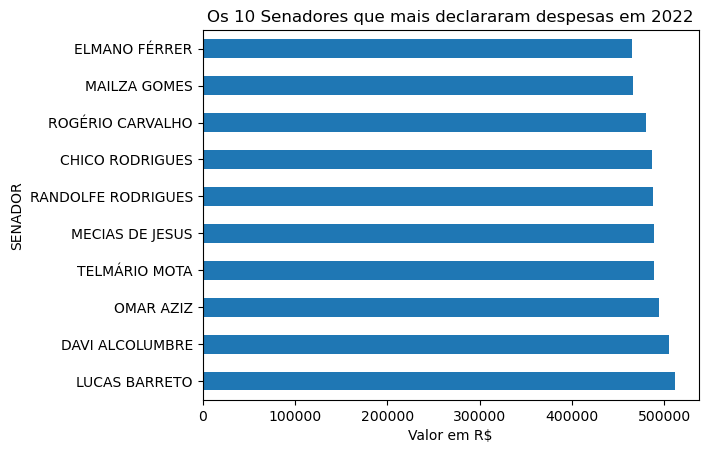

In [14]:
senadores = dataframe_tratado.groupby("SENADOR")["VALOR_REEMBOLSADO"].sum().sort_values(ascending=False)[:10].index
dataframe_tratado.groupby("SENADOR")["VALOR_REEMBOLSADO"].sum().sort_values(ascending=False)[:10].plot(kind="barh", 
                                                                                                       xlabel="Valor em R$", 
                                                                                                       title="Os 10 Senadores que mais declararam despesas em 2022")

Vamos pegar o nome dos 10 que mais declararam despesas em 2022 e vamos ver suas despesas ao longo dos meses

In [15]:
senadores = senadores.to_list()
dataframe_senadores_filtrados = dataframe_tratado[dataframe_tratado['SENADOR'].isin(senadores)]
dataframe_senadores_filtrados.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,VALOR_REEMBOLSADO
1640,2022,1,CHICO RODRIGUES,"Aluguel de imóveis para escritório político, c...",07.872.397/0001-50,INFORR - SOLUÇÕES EM TECNOLOGIA,2022-01-04,154.00
1641,2022,1,CHICO RODRIGUES,"Aluguel de imóveis para escritório político, c...",05.423.963/0149-29,OI MÓVEL S.A,2022-01-15,163.06
1642,2022,1,CHICO RODRIGUES,Aquisição de material de consumo para uso no e...,05.730.257/0004-65,Supermercado Gavião LTDA,2022-02-01,107.68
1643,2022,1,CHICO RODRIGUES,Divulgação da atividade parlamentar,29.866.716/0001-58,BRASILIA POST SERVIÇO DE COMUNICACAO DIGITAL E...,2022-01-18,12000.00
1644,2022,1,CHICO RODRIGUES,Divulgação da atividade parlamentar,29.866.716/0001-58,BRASILIA POST SERVIÇO DE COMUNICACAO DIGITAL E...,2022-02-01,12000.00


In [16]:
df_senadores_agrupados = dataframe_senadores_filtrados.groupby(['MES', 'SENADOR'])['VALOR_REEMBOLSADO'].sum().reset_index()
df_senadores_agrupados.head()

,MES,SENADOR,VALOR_REEMBOLSADO
0,1,CHICO RODRIGUES,50738.93
1,1,DAVI ALCOLUMBRE,41185.00
2,1,ELMANO FÉRRER,34477.39
3,1,LUCAS BARRETO,32773.63
4,1,MAILZA GOMES,46361.49


Podemos observar que nos gráficos abaixo, exite um padrão demonstrado por alguns dos senadores, um aumento expressivo do aumento das despesas no mês 3,6,11

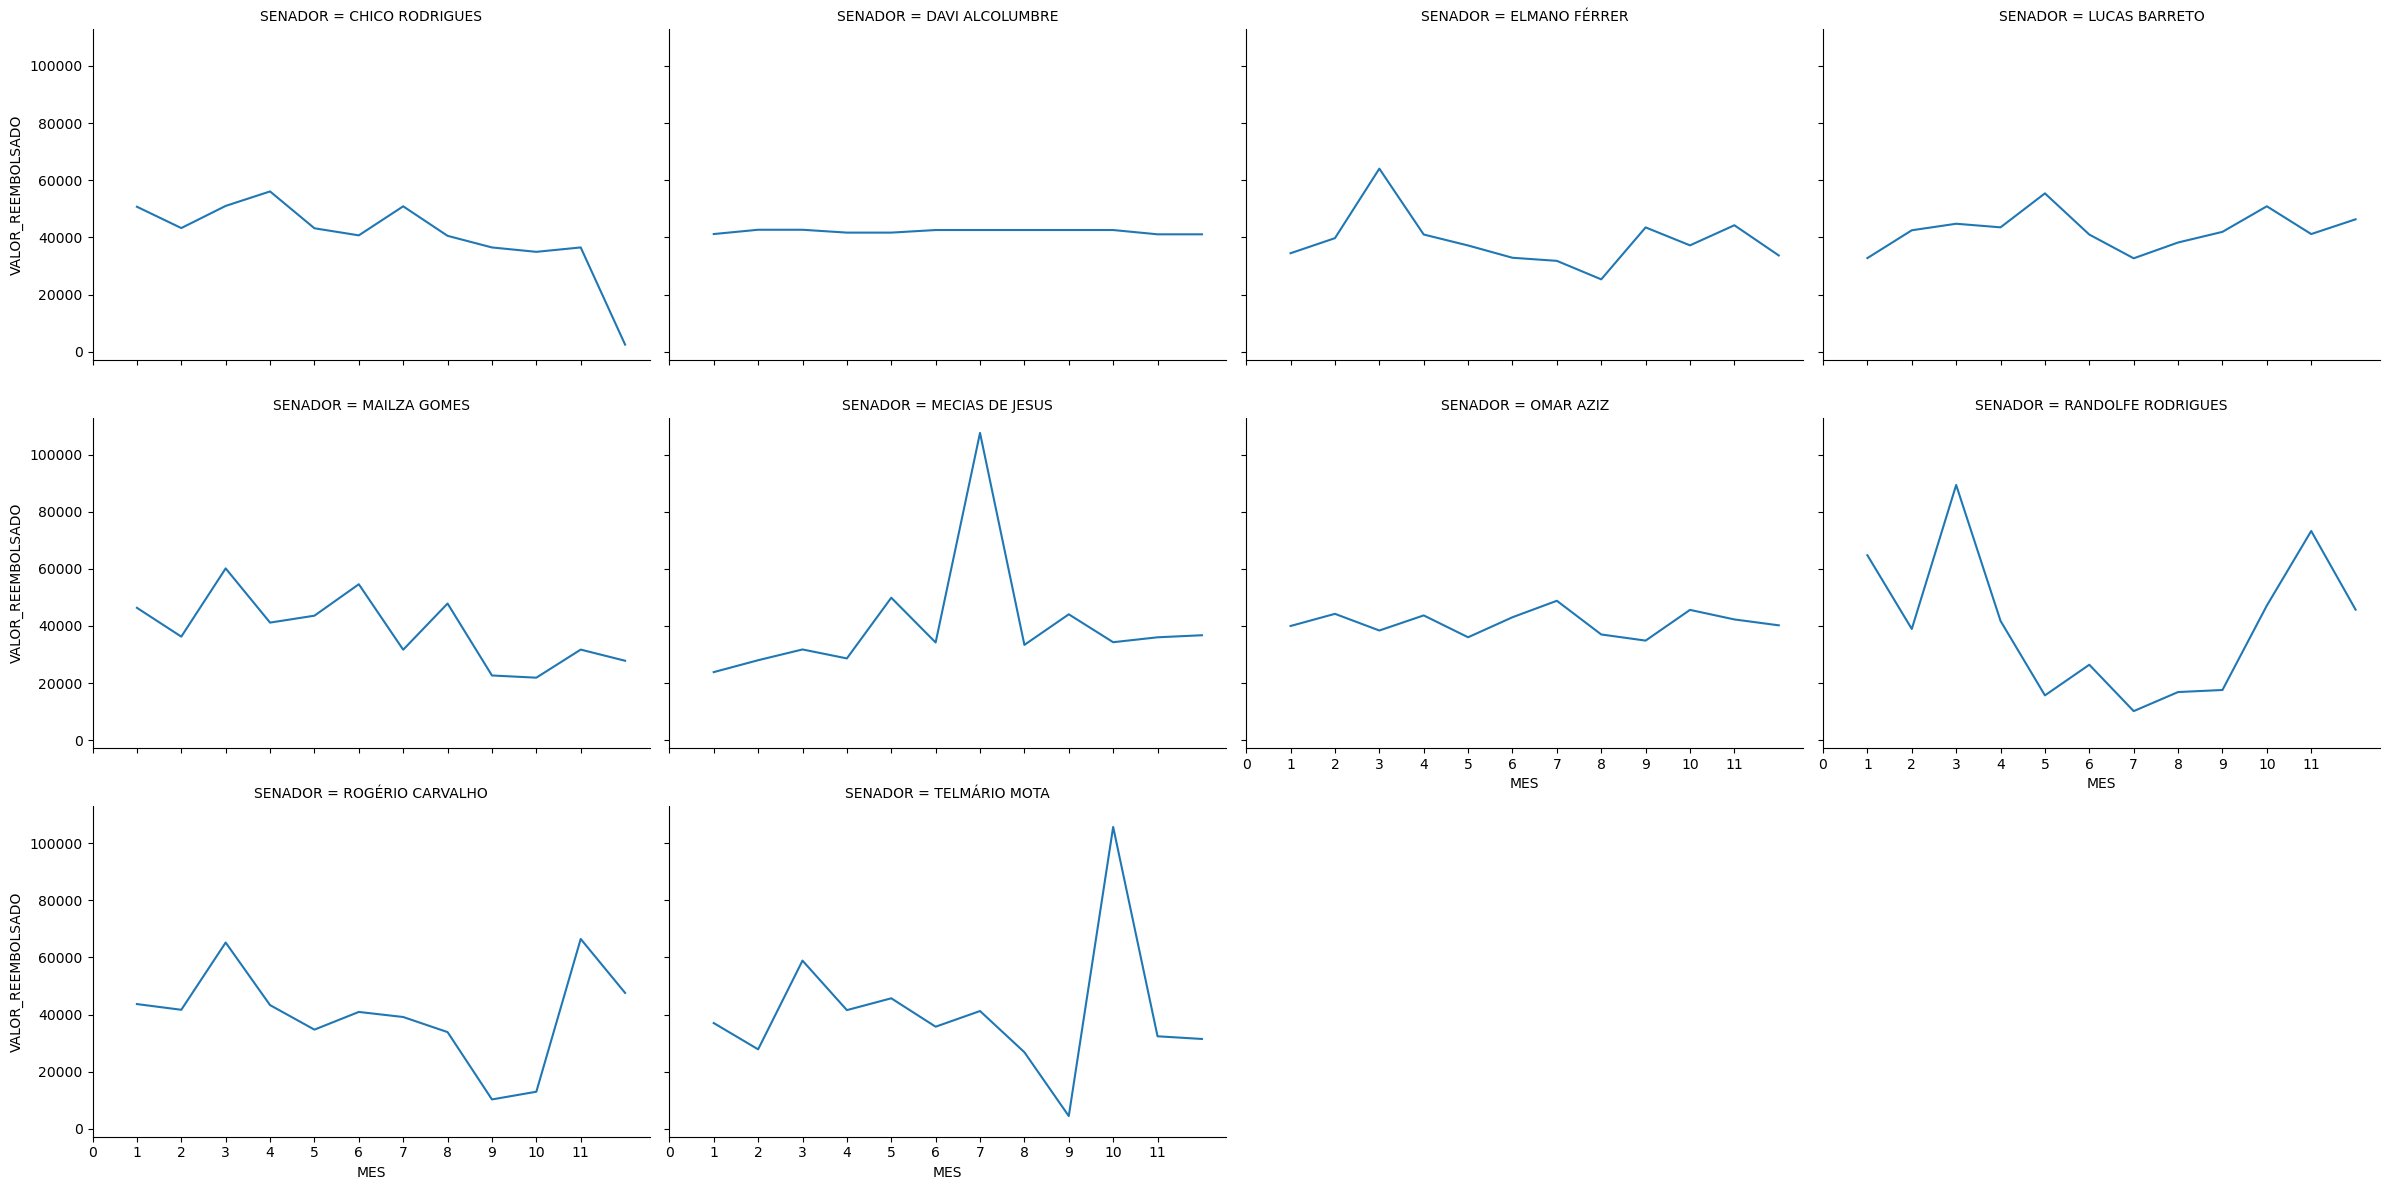

In [17]:
g = sns.FacetGrid(df_senadores_agrupados, col="SENADOR" , col_wrap=4, height=4, aspect=1.5)
g.map(sns.lineplot, 'MES', 'VALOR_REEMBOLSADO')
for ax in g.axes.flat:
    ax.set_xticks(range(len(df_senadores_agrupados['MES'].unique())))


Agora vamos ver como foi divido as despesas pelo Senador que mais teve despesas

In [18]:
lucas_barreto = dataframe_tratado[dataframe_tratado["SENADOR"] == "LUCAS BARRETO"].groupby(["SENADOR", "TIPO_DESPESA"])['VALOR_REEMBOLSADO'].sum().reset_index()

Como podemos ver, a maior parte das despesas desse senador podem ser resumidas em locomoção e os demais serviços necessário quando se ocorre essas locomoções, representando 56% das suas despesas totais, que são as Passagens e as hospedagem, alimentação e combustível.

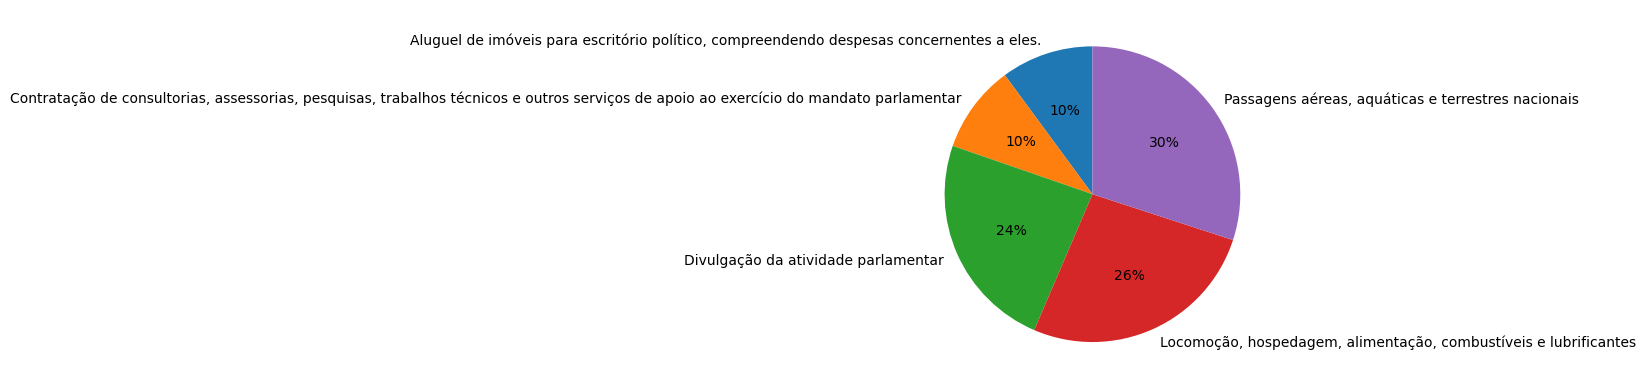

In [19]:
plt.pie(lucas_barreto.VALOR_REEMBOLSADO, labels=lucas_barreto.TIPO_DESPESA, autopct='%1.0f%%', startangle=90)
plt.show()

### Curiosidades

Existem erros registro do dataset, como pode ser abservado a abaixo, os valores menores que R$1 são possíveis erros de digitação.

In [20]:
dataframe_tratado.describe()

,ANO,MES,DATA,VALOR_REEMBOLSADO
count,16782.0,16782.000000,16782,16782.000000
mean,2022.0,6.258372,2022-06-19 02:01:55.838398208,1626.333488
min,2022.0,1.000000,2000-12-08 00:00:00,0.010000
25%,2022.0,3.000000,2022-03-29 00:00:00,200.000000
50%,2022.0,6.000000,2022-06-14 00:00:00,480.000000
75%,2022.0,9.000000,2022-09-16 18:00:00,2000.000000
max,2022.0,12.000000,2023-12-23 00:00:00,77012.000000
std,0.0,3.302406,NaN,3366.219387


In [21]:
dataframe_tratado.query("VALOR_REEMBOLSADO < 1")

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,VALOR_REEMBOLSADO
958,2022,1,CARLOS PORTINHO,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,AZUL,2022-01-19,0.01
2586,2022,4,DÁRIO BERGER,"Passagens aéreas, aquáticas e terrestres nacio...",33.937.681/0001-78,LATAM,2022-04-20,0.01
8568,2022,7,JEAN PAUL PRATES,"Locomoção, hospedagem, alimentação, combustíve...",05.756.905/0001-00,ASSU COMERCIAL DE PETROLEO EIRELLI,2022-07-22,0.03
13460,2022,10,RENAN CALHEIROS,"Aluguel de imóveis para escritório político, c...",76.535.764/0006-58,OI S.A,2022-10-25,0.20


In [22]:
index = dataframe_tratado.query("VALOR_REEMBOLSADO < 1").index
dataframe.iloc[index]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
958,2022,1,CARLOS PORTINHO,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,AZUL,MGMLGZ,19/01/2022,"Companhia Aérea: AZUL, Localizador: MGMLGZ. Pa...",",01",2173057
2586,2022,4,DÁRIO BERGER,"Passagens aéreas, aquáticas e terrestres nacio...",33.937.681/0001-78,LATAM,TGJGQI,20/04/2022,"Companhia Aérea: LATAM, Localizador: TGJGQI. P...",",01",2179322
8568,2022,7,JEAN PAUL PRATES,"Locomoção, hospedagem, alimentação, combustíve...",05.756.905/0001-00,ASSU COMERCIAL DE PETROLEO EIRELLI,143432,22/07/2022,NaN,",03",2184690
13460,2022,10,RENAN CALHEIROS,"Aluguel de imóveis para escritório político, c...",76.535.764/0006-58,OI S.A,NaN,25/10/2022,NaN,",2",2189142


O Maior valor de despesa do Senador foi do Sérgio Petecão no valor de R$77012,00, com base na [nota fiscal](https://www6g.senado.leg.br/transparencia/sen/download/ceaps/documento/175346) foi o serviço de despesa com produção de textos e edição de vídeos para a divulgação de atividade parlamentar.


In [23]:
dataframe_tratado.query("`VALOR_REEMBOLSADO` > 77000")

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,VALOR_REEMBOLSADO
14607,2022,2,SÉRGIO PETECÃO,"Contratação de consultorias, assessorias, pesq...",12.980.692/0001-60,P. H. A. RAMALHO - ME,2022-02-28,77012.0


Com os dados da forma em que se encontram, talvez seja possível seguir adiante e implementar algum modelo de machine learning para detecção de anomalias, ou previsão de gastos futuros.

Essa atividade foi realizada para a matéria **Visualização da Informação** ministrada pelo professor **Cayro Macedo Mendes**